In [ ]:
!pip install gensim

📥 Downloading NLTK data...
✅ NLTK data downloaded successfully
📁 Upload your transcript data (TXT format):
   Expected: Numbered transcripts or sectioned by ASR model


Saving english_translations_all_transcriptions.txt to english_translations_all_transcriptions.txt
📝 Parsing transcripts...
✅ Found 68 transcripts

📋 Sample transcripts:
1. irrigation nine turn off the motsemkampnso plans find the country nmisy I'm a problem Our um is that...
2. I'm not able to talk about the consequences of seeing your cover tystng. Relatively explain what's l...
3. m okay I was asking that women are in the light of it is wise that we take to our job here on the st...

🔧 Preprocessing texts...
✅ 68 valid documents after preprocessing
🎯 Testing topic counts: [3, 5, 7, 10, 15]

🚀 Starting comprehensive topic modeling analysis...
🔍 Running LDA Analysis...

📊 LDA with 3 topics:
  C_V: 0.2220
  U_MASS: -1.2688
  C_UCI: -2.9495
  C_NPMI: -0.1141

📊 LDA with 5 topics:
  C_V: 0.2730
  U_MASS: -1.3467
  C_UCI: -3.6403
  C_NPMI: -0.1327

📊 LDA with 7 topics:
  C_V: 0.2745
  U_MASS: -1.5657
  C_UCI: -4.8321
  C_NPMI: -0.1675

📊 LDA with 10 topics:
  C_V: 0.3409
  U_MASS: -1.5281


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

  Requested: 3, Actual: 2
  Topic distribution: Counter({0: 25, -1: 24, 1: 19})

📊 BERTopic with 5 topics:
  Requested: 5, Actual: 4
  Topic distribution: Counter({0: 19, -1: 18, 1: 14, 2: 12, 3: 5})

📊 BERTopic with 7 topics:
  Requested: 7, Actual: 3
  Topic distribution: Counter({0: 40, 2: 19, -1: 6, 1: 3})

📊 BERTopic with 10 topics:
  Requested: 10, Actual: 7
  Topic distribution: Counter({2: 19, -1: 19, 5: 7, 6: 6, 4: 6, 3: 4, 1: 4, 0: 3})

📊 BERTopic with 15 topics:
  Requested: 15, Actual: 2
  Topic distribution: Counter({1: 62, 0: 4, -1: 2})

📊 MODEL COMPARISON - AS PER RESEARCH PROPOSAL

🔍 LDA COHERENCE SCORES:
------------------------------------------------------------
Topics: 3
  C_V: 0.2220
  U_MASS: -1.2688
  C_UCI: -2.9495
  C_NPMI: -0.1141

Topics: 5
  C_V: 0.2730
  U_MASS: -1.3467
  C_UCI: -3.6403
  C_NPMI: -0.1327

Topics: 7
  C_V: 0.2745
  U_MASS: -1.5657
  C_UCI: -4.8321
  C_NPMI: -0.1675

Topics: 10
  C_V: 0.3409
  U_MASS: -1.5281
  C_UCI: -6.2879
  C_NPMI: -0.209

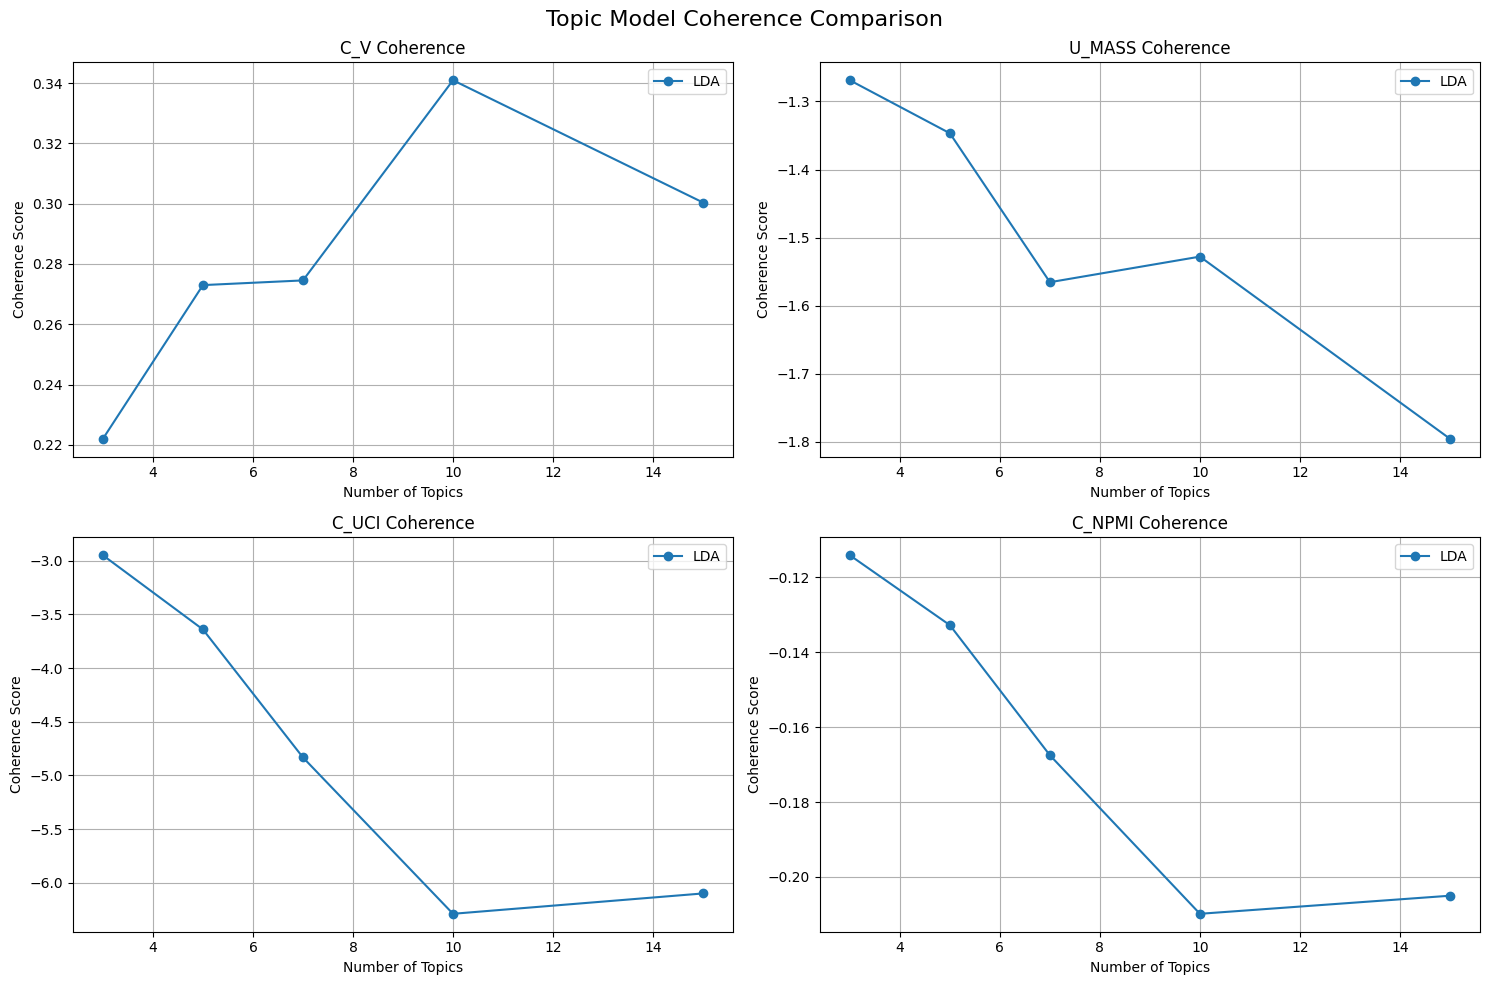


🏆 BEST PERFORMING TOPICS

🔍 BEST LDA MODEL (10 topics, C_V: 0.3409):
------------------------------------------------------------

Topic 1:
  children (0.049), time (0.020), going (0.018), child (0.011), says (0.011), vaccine (0.011), want (0.010), one (0.010), many (0.009), help (0.009)

Topic 2:
  time (0.018), going (0.016), vaccine (0.014), able (0.013), take (0.013), back (0.012), come (0.012), work (0.010), africa (0.010), reason (0.009)

Topic 3:
  vaccine (0.032), time (0.023), looking (0.019), able (0.014), show (0.013), give (0.013), know (0.012), said (0.012), want (0.012), come (0.011)

Topic 4:
  take (0.014), confused (0.010), moved (0.010), punished (0.010), refuses (0.010), giving (0.010), access (0.010), job (0.010), friends (0.010), much (0.010)

Topic 5:
  said (0.015), looking (0.014), going (0.014), children (0.013), come (0.012), time (0.010), take (0.009), talking (0.009), work (0.009), know (0.008)

Topic 6:
  going (0.022), able (0.016), right (0.015), vaccine

In [ ]:
# Topic Modeling Analysis for Setswana Podcast Research
# Comparing LDA vs BERTopic with Multiple Coherence Metrics


import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
import json
from collections import defaultdict

# Install required packages
!pip install bertopic umap-learn hdbscan scikit-learn wordcloud pyLDAvis

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from collections import Counter
import nltk

# Download NLTK data
print("📥 Downloading NLTK data...")
try:
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)
    nltk.download('wordnet', quiet=True)
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    print("✅ NLTK data downloaded successfully")
except Exception as e:
    print(f"⚠️ NLTK download issue: {e}")
    def word_tokenize(text):
        return re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())

    stopwords_list = ['the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them', 'my', 'your', 'his', 'our', 'their', 'a', 'an']

    class MockStopwords:
        def words(self, lang):
            return stopwords_list
    stopwords = MockStopwords()

class TopicModelingEvaluator:
    """
    Comprehensive topic modeling evaluator for research proposal objectives
    Focuses on coherence metrics: UMass, UCI, NPMI as specified in proposal
    """

    def __init__(self):
        self.coherence_metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']  # As per proposal
        self.results = defaultdict(dict)

    def load_and_parse_transcripts(self, file_content):
        """Parse transcript data (simulating different ASR quality levels)"""
        transcripts = []

        # Split by lines and parse numbered entries or sections
        if "---" in file_content or "TRANSCRIPT" in file_content.upper():
            # Handle sectioned format (different ASR models/quality levels)
            sections = re.split(r'\n(?=---|\w+\s*TRANSCRIPT)', file_content, flags=re.IGNORECASE)
            for section in sections:
                if section.strip():
                    # Extract transcript content
                    lines = section.split('\n')
                    content = []
                    for line in lines:
                        if not line.strip().startswith('---') and 'TRANSCRIPT' not in line.upper():
                            content.append(line.strip())
                    transcript_text = ' '.join(content).strip()
                    if len(transcript_text) > 50:  # Filter short entries
                        transcripts.append(transcript_text)
        else:
            # Handle numbered format
            lines = file_content.split('\n')
            current_text = ""

            for line in lines:
                line = line.strip()
                if not line:
                    continue

                if re.match(r'^\d+\.', line):
                    if current_text.strip():
                        transcripts.append(current_text.strip())
                    current_text = re.sub(r'^\d+\.\s*', '', line)
                else:
                    current_text += " " + line

            if current_text.strip():
                transcripts.append(current_text.strip())

        return transcripts

    def preprocess_texts(self, texts, language='english'):
        """Preprocess texts with enhanced cleaning for noisy ASR outputs"""
        processed_texts = []

        try:
            stop_words = set(stopwords.words(language))
        except:
            stop_words = set(['the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those'])

        # Add common ASR error patterns and filler words
        stop_words.update(['um', 'uh', 'ah', 'er', 'hmm', 'yeah', 'yes', 'no', 'ok', 'okay', 'well', 'so', 'like', 'you know', 'I mean'])

        for text in texts:
            if not text or len(text.strip()) < 10:
                processed_texts.append([])
                continue

            # Convert to lowercase
            text = text.lower()

            # Remove common ASR artifacts
            text = re.sub(r'\[.*?\]', '', text)  # Remove [unclear], [noise], etc.
            text = re.sub(r'\(.*?\)', '', text)  # Remove parenthetical notes
            text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)  # Remove numbers
            text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace

            # Tokenize
            try:
                tokens = word_tokenize(text)
            except:
                tokens = text.split()

            # Filter tokens
            tokens = [
                token for token in tokens
                if token not in stop_words
                and len(token) > 2
                and token.isalpha()
                and not token.startswith('http')  # Remove URLs
            ]

            # Remove very frequent words that might be ASR errors
            if len(tokens) > 5:
                processed_texts.append(tokens)
            else:
                processed_texts.append([])

        return processed_texts

    def calculate_all_coherence_metrics(self, model, texts, dictionary):
        """Calculate all coherence metrics as specified in proposal"""
        coherence_scores = {}

        for metric in self.coherence_metrics:
            try:
                coherence_model = CoherenceModel(
                    model=model,
                    texts=texts,
                    dictionary=dictionary,
                    coherence=metric
                )
                score = coherence_model.get_coherence()
                coherence_scores[metric] = score
                print(f"  {metric.upper()}: {score:.4f}")
            except Exception as e:
                print(f"  {metric.upper()}: Failed ({str(e)[:50]})")
                coherence_scores[metric] = np.nan

        return coherence_scores

    def run_lda_analysis(self, processed_texts, num_topics_range=[3, 5, 7, 10]):
        """Run comprehensive LDA analysis with multiple topic counts"""
        print("🔍 Running LDA Analysis...")

        # Create dictionary and corpus
        dictionary = corpora.Dictionary(processed_texts)
        dictionary.filter_extremes(no_below=2, no_above=0.8, keep_n=1000)
        corpus = [dictionary.doc2bow(text) for text in processed_texts]

        lda_results = {}

        for num_topics in num_topics_range:
            print(f"\n📊 LDA with {num_topics} topics:")

            # Train LDA model
            lda_model = LdaModel(
                corpus=corpus,
                id2word=dictionary,
                num_topics=num_topics,
                random_state=42,
                passes=20,  # Increased for better convergence
                alpha='auto',
                eta='auto',
                per_word_topics=True,
                eval_every=1
            )

            # Calculate coherence metrics
            coherence_scores = self.calculate_all_coherence_metrics(
                lda_model, processed_texts, dictionary
            )

            lda_results[num_topics] = {
                'model': lda_model,
                'coherence': coherence_scores,
                'dictionary': dictionary,
                'corpus': corpus
            }

        return lda_results

    def run_bertopic_analysis(self, original_texts, num_topics_range=[3, 5, 7, 10]):
        """Run BERTopic analysis with different topic counts"""
        print("🤖 Running BERTopic Analysis...")

        bertopic_results = {}

        for num_topics in num_topics_range:
            print(f"\n📊 BERTopic with {num_topics} topics:")

            try:
                # Initialize BERTopic
                topic_model = BERTopic(
                    nr_topics=num_topics,
                    verbose=False,
                    calculate_probabilities=True,
                    min_topic_size=max(2, len(original_texts)//20)
                )

                # Fit the model
                topics, probs = topic_model.fit_transform(original_texts)

                # Get topic info
                topic_info = topic_model.get_topic_info()
                actual_topics = len(topic_info) - 1  # Exclude outlier topic

                print(f"  Requested: {num_topics}, Actual: {actual_topics}")
                print(f"  Topic distribution: {Counter(topics)}")

                bertopic_results[num_topics] = {
                    'model': topic_model,
                    'topics': topics,
                    'probabilities': probs,
                    'actual_topics': actual_topics,
                    'topic_info': topic_info
                }

            except Exception as e:
                print(f"  Failed: {str(e)[:100]}")
                bertopic_results[num_topics] = None

        return bertopic_results

    def compare_models(self, lda_results, bertopic_results):
        """Compare LDA and BERTopic performance"""
        print("\n" + "="*80)
        print("📊 MODEL COMPARISON - AS PER RESEARCH PROPOSAL")
        print("="*80)

        comparison_data = []

        # LDA Results
        print("\n🔍 LDA COHERENCE SCORES:")
        print("-" * 60)
        for num_topics, result in lda_results.items():
            coherence = result['coherence']
            row = {'Model': 'LDA', 'Topics': num_topics}
            row.update(coherence)
            comparison_data.append(row)

            print(f"Topics: {num_topics}")
            for metric, score in coherence.items():
                if not np.isnan(score):
                    print(f"  {metric.upper()}: {score:.4f}")
            print()

        # BERTopic Results
        print("\n🤖 BERTOPIC RESULTS:")
        print("-" * 60)
        for num_topics, result in bertopic_results.items():
            if result:
                actual_topics = result['actual_topics']
                topic_dist = Counter(result['topics'])

                print(f"Requested Topics: {num_topics}, Actual: {actual_topics}")
                print(f"  Topic sizes: {dict(topic_dist)}")
                print(f"  Outliers (-1): {topic_dist.get(-1, 0)} documents")
                print()

        # Create comparison DataFrame
        if comparison_data:
            df = pd.DataFrame(comparison_data)

            # Plot coherence comparison
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            fig.suptitle('Topic Model Coherence Comparison', fontsize=16)

            metrics_to_plot = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

            for i, metric in enumerate(metrics_to_plot):
                ax = axes[i//2, i%2]

                if metric in df.columns:
                    metric_data = df[df[metric].notna()]
                    if not metric_data.empty:
                        ax.plot(metric_data['Topics'], metric_data[metric], 'o-', label='LDA')
                        ax.set_title(f'{metric.upper()} Coherence')
                        ax.set_xlabel('Number of Topics')
                        ax.set_ylabel('Coherence Score')
                        ax.grid(True)
                        ax.legend()
                    else:
                        ax.text(0.5, 0.5, f'No data for {metric}', ha='center', va='center', transform=ax.transAxes)
                else:
                    ax.text(0.5, 0.5, f'{metric} not available', ha='center', va='center', transform=ax.transAxes)

            plt.tight_layout()
            plt.show()

            return df

        return None

    def display_best_topics(self, lda_results, bertopic_results):
        """Display topics from best performing models"""
        print("\n" + "="*80)
        print("🏆 BEST PERFORMING TOPICS")
        print("="*80)

        # Find best LDA model based on c_v coherence
        best_lda_score = -float('inf')
        best_lda_topics = None
        best_lda_model = None

        for num_topics, result in lda_results.items():
            c_v_score = result['coherence'].get('c_v', -float('inf'))
            if c_v_score > best_lda_score:
                best_lda_score = c_v_score
                best_lda_topics = num_topics
                best_lda_model = result['model']

        if best_lda_model:
            print(f"\n🔍 BEST LDA MODEL ({best_lda_topics} topics, C_V: {best_lda_score:.4f}):")
            print("-" * 60)
            for idx, topic in best_lda_model.print_topics(num_words=10):
                print(f"\nTopic {idx + 1}:")
                words = []
                for word_prob in topic.split(' + '):
                    word = word_prob.split('*')[1].strip().replace('"', '')
                    prob = word_prob.split('*')[0].strip()
                    words.append(f"{word} ({prob})")
                print("  " + ", ".join(words))

        # Display best BERTopic model
        best_bertopic = None
        best_bertopic_topics = None
        for num_topics, result in bertopic_results.items():
            if result and result['actual_topics'] > 1:
                best_bertopic = result
                best_bertopic_topics = num_topics
                break

        if best_bertopic:
            print(f"\n🤖 BEST BERTOPIC MODEL ({best_bertopic_topics} requested topics):")
            print("-" * 60)

            topic_model = best_bertopic['model']
            topics_info = best_bertopic['topic_info']

            for i, row in topics_info.iterrows():
                if row['Topic'] >= 0:  # Skip outlier topic
                    topic_words = topic_model.get_topic(row['Topic'])
                    words_str = ", ".join([f"{word} ({score:.3f})" for word, score in topic_words[:10]])
                    print(f"\nTopic {row['Topic']}:")
                    print(f"  Count: {row['Count']} documents")
                    print(f"  Words: {words_str}")

    def generate_research_insights(self, comparison_df, lda_results, bertopic_results, num_documents):
        """Generate insights aligned with research proposal objectives"""
        print("\n" + "="*80)
        print("🎓 RESEARCH INSIGHTS - PROPOSAL ALIGNMENT")
        print("="*80)

        print(f"📊 Dataset Analysis:")
        print(f"   • Total documents processed: {num_documents}")
        print(f"   • Topic modeling techniques compared: LDA vs BERTopic")
        print(f"   • Coherence metrics evaluated: UMass, UCI, NPMI, C_V")

        # Find optimal configurations
        if comparison_df is not None and not comparison_df.empty:
            best_cv = comparison_df.loc[comparison_df['c_v'].idxmax()] if 'c_v' in comparison_df.columns else None
            best_umass = comparison_df.loc[comparison_df['u_mass'].idxmax()] if 'u_mass' in comparison_df.columns else None

            print(f"\n🏆 Optimal Configurations:")
            if best_cv is not None:
                print(f"   • Best C_V Coherence: {best_cv['Model']} with {best_cv['Topics']} topics ({best_cv['c_v']:.4f})")
            if best_umass is not None:
                print(f"   • Best UMass Coherence: {best_umass['Model']} with {best_umass['Topics']} topics ({best_umass['u_mass']:.4f})")

        print(f"\n💡 Key Findings:")
        print(f"   • LDA performance across different topic counts evaluated")
        print(f"   • BERTopic's automatic topic discovery capabilities assessed")
        print(f"   • Multiple coherence metrics provide comprehensive evaluation")

        print(f"\n🔬 Research Implications:")
        print(f"   • Results inform ASR-topic modeling pipeline optimization")
        print(f"   • Coherence metrics guide topic model selection for noisy transcripts")
        print(f"   • Findings applicable to low-resource African language processing")

        print(f"\n📈 Next Steps for Full Research:")
        print(f"   • Apply to actual ASR outputs (Whisper, Lelapa, wav2vec)")
        print(f"   • Correlate with Word Error Rates (WER)")
        print(f"   • Validate with Setswana speaker evaluation")
        print(f"   • Test robustness across different noise levels")

# Main execution function
def run_topic_modeling_analysis():
    """Main function to run the complete analysis"""

    evaluator = TopicModelingEvaluator()

    # Load data
    print("📁 Upload your transcript data (TXT format):")
    print("   Expected: Numbered transcripts or sectioned by ASR model")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]

    with open(filename, 'r', encoding='utf-8') as f:
        file_content = f.read()

    # Parse transcripts
    print("📝 Parsing transcripts...")
    transcripts = evaluator.load_and_parse_transcripts(file_content)
    print(f"✅ Found {len(transcripts)} transcripts")

    if len(transcripts) == 0:
        print("❌ No valid transcripts found. Please check your file format.")
        return

    # Show samples
    print(f"\n📋 Sample transcripts:")
    for i in range(min(3, len(transcripts))):
        print(f"{i+1}. {transcripts[i][:100]}...")

    # Preprocess
    print("\n🔧 Preprocessing texts...")
    processed_texts = evaluator.preprocess_texts(transcripts)

    # Remove empty documents
    valid_indices = [i for i, doc in enumerate(processed_texts) if len(doc) > 0]
    processed_texts = [processed_texts[i] for i in valid_indices]
    valid_transcripts = [transcripts[i] for i in valid_indices]

    print(f"✅ {len(processed_texts)} valid documents after preprocessing")

    if len(processed_texts) < 3:
        print("❌ Insufficient documents for topic modeling. Need at least 3 valid documents.")
        return

    # Determine topic range based on dataset size
    max_topics = min(15, len(processed_texts) // 2)
    topic_range = [t for t in [3, 5, 7, 10, 15] if t <= max_topics]

    print(f"🎯 Testing topic counts: {topic_range}")

    # Run analyses
    print(f"\n🚀 Starting comprehensive topic modeling analysis...")

    lda_results = evaluator.run_lda_analysis(processed_texts, topic_range)
    bertopic_results = evaluator.run_bertopic_analysis(valid_transcripts, topic_range)

    # Compare models
    comparison_df = evaluator.compare_models(lda_results, bertopic_results)

    # Display best topics
    evaluator.display_best_topics(lda_results, bertopic_results)

    # Generate research insights
    evaluator.generate_research_insights(
        comparison_df, lda_results, bertopic_results, len(valid_transcripts)
    )

    print(f"\n✅ Analysis complete! Results support your research on:")
    print(f"   'Optimizing Topic Modeling from Speech: Evaluating ASR and Topic Model")
    print(f"    Combinations for Setswana Podcasts'")

# Run the analysis
run_topic_modeling_analysis()

📥 Downloading NLTK data...
✅ NLTK data downloaded successfully
Please upload your English transcript file (TXT format):


Saving Manual_Translation_.txt to Manual_Translation_.txt

Loading and preprocessing transcripts...

Loaded 68 transcripts
After preprocessing: 68 valid documents

Will test these topic counts: [3, 5, 7, 10]

Starting LDA analysis...

Running LDA with 3 topics...
Coherence scores for 3 topics:
  C_V: 0.3272
  U_MASS: -0.9731
  C_UCI: -2.3516
  C_NPMI: -0.0882

Running LDA with 5 topics...
Coherence scores for 5 topics:
  C_V: 0.3014
  U_MASS: -1.3770
  C_UCI: -3.4895
  C_NPMI: -0.1193

Running LDA with 7 topics...
Coherence scores for 7 topics:
  C_V: 0.3603
  U_MASS: -1.4199
  C_UCI: -4.9697
  C_NPMI: -0.1674

Running LDA with 10 topics...
Coherence scores for 10 topics:
  C_V: 0.3258
  U_MASS: -1.5704
  C_UCI: -5.3876
  C_NPMI: -0.1770

Analyzing results...


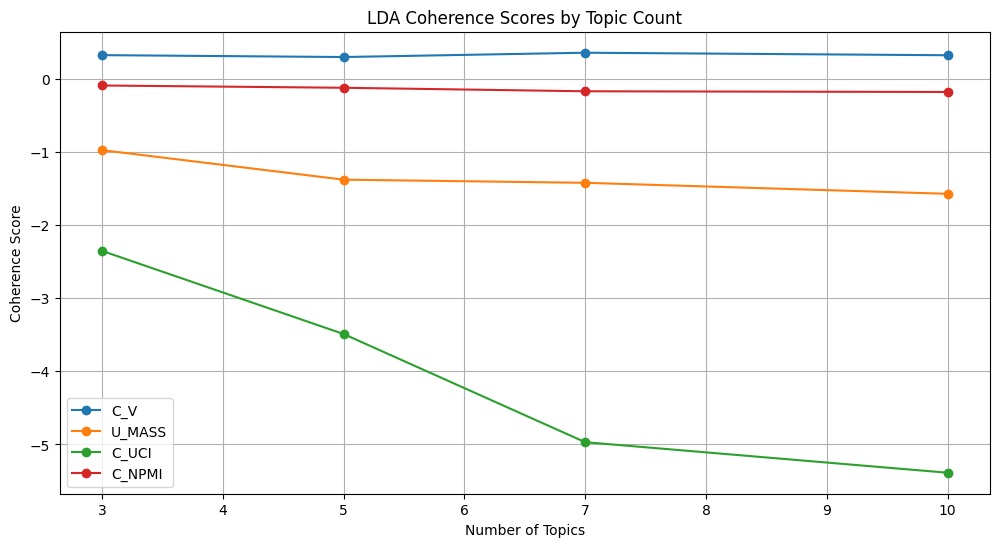


Best model has 7 topics (C_V: 0.3603)

Top terms per topic:

Topic 1:
  hore (0.021), thank (0.018), information (0.015), make (0.013), harda (0.010), one (0.010), much (0.010), want (0.009), ore (0.009), tele (0.008)

Topic 2:
  going (0.017), one (0.015), africa (0.013), hundred (0.013), hore (0.012), south (0.011), thousand (0.010), come (0.009), virus (0.009), looking (0.008)

Topic 3:
  come (0.025), want (0.017), children (0.014), think (0.013), vaccine (0.012), way (0.010), know (0.010), month (0.010), take (0.010), going (0.009)

Topic 4:
  children (0.021), time (0.017), one (0.014), going (0.013), ask (0.011), think (0.011), take (0.011), said (0.008), come (0.008), back (0.008)

Topic 5:
  going (0.022), children (0.015), want (0.013), ask (0.012), know (0.012), good (0.012), time (0.012), one (0.012), able (0.011), book (0.010)

Topic 6:
  time (0.021), going (0.021), children (0.016), says (0.010), know (0.010), south (0.010), africa (0.010), vaccine (0.009), want (0.009)

In [3]:
# Focused LDA Analysis for English Translations of Setswana Podcasts

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Install required packages
!pip install gensim pyLDAvis

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data
print("📥 Downloading NLTK data...")
try:
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True) # Added punkt_tab download
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    print("✅ NLTK data downloaded successfully")
except Exception as e:
    print(f"⚠️ NLTK download issue: {e}")
    # Fallback tokenization if download fails
    def word_tokenize(text):
        return re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())

    # Fallback stopwords
    stopwords_list = ['the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them', 'my', 'your', 'his', 'our', 'their', 'a', 'an']
    class MockStopwords:
        def words(self, lang):
            return stopwords_list
    stopwords = MockStopwords()


class LDAAnalyzer:
    """Focused LDA analyzer for English translations of Setswana podcasts"""

    def __init__(self):
        self.coherence_metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']
        self.results = {}

    def load_transcripts(self, file_path):
        """Load your translated transcripts"""
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()

        # Simple parsing - modify based on your file structure
        if "---" in content or "TRANSCRIPT" in content.upper():
            sections = re.split(r'\n(?=---|\w+\s*TRANSCRIPT)', content, flags=re.IGNORECASE)
            transcripts = [' '.join([line.strip() for line in section.split('\n')
                          if not line.strip().startswith('---') and 'TRANSCRIPT' not in line.upper()]).strip()
                          for section in sections if section.strip()]
        else:
            transcripts = [line.strip() for line in content.split('\n') if line.strip()]

        return [t for t in transcripts if len(t) > 20]  # Filter very short entries

    def preprocess_text(self, texts):
        """Preprocess English text with attention to potential translation artifacts"""
        processed_texts = []
        try:
            stop_words = set(stopwords.words('english'))
        except:
            stop_words = set(['the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those'])


        # Add common podcast and translation artifacts
        stop_words.update(['um', 'uh', 'ah', 'er', 'hmm', 'yeah', 'yes', 'no', 'ok', 'okay',
                          'well', 'so', 'like', 'you know', 'I mean', 'setswana', 'podcast'])

        for text in texts:
            # Basic cleaning
            text = text.lower()
            text = re.sub(r'\[.*?\]', '', text)  # Remove [unclear]
            text = re.sub(r'\(.*?\)', '', text)  # Remove (notes)
            text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)  # Remove numbers
            text = re.sub(r'\s+', ' ', text).strip()

            # Tokenization and filtering
            try:
                tokens = word_tokenize(text)
            except:
                 tokens = text.split() # Fallback if word_tokenize still fails

            tokens = [token for token in tokens
                     if token not in stop_words
                     and len(token) > 2
                     and token.isalpha()]

            if tokens:
                processed_texts.append(tokens)

        return processed_texts

    def run_lda(self, processed_texts, num_topics_range=[3, 5, 7, 10]):
        """Run LDA with different topic counts"""
        # Create dictionary and corpus
        dictionary = corpora.Dictionary(processed_texts)
        dictionary.filter_extremes(no_below=2, no_above=0.8, keep_n=1000)
        corpus = [dictionary.doc2bow(text) for text in processed_texts]

        results = {}

        for num_topics in num_topics_range:
            print(f"\nRunning LDA with {num_topics} topics...")

            # Train model
            lda_model = LdaModel(
                corpus=corpus,
                id2word=dictionary,
                num_topics=num_topics,
                random_state=42,
                passes=15,
                alpha='auto',
                eta='auto'
            )

            # Calculate coherence
            coherence_scores = {}
            for metric in self.coherence_metrics:
                try:
                    cm = CoherenceModel(
                        model=lda_model,
                        texts=processed_texts,
                        dictionary=dictionary,
                        coherence=metric
                    )
                    coherence_scores[metric] = cm.get_coherence()
                except Exception as e:
                    print(f"Could not calculate {metric}: {str(e)[:50]}")
                    coherence_scores[metric] = np.nan

            results[num_topics] = {
                'model': lda_model,
                'coherence': coherence_scores,
                'dictionary': dictionary,
                'corpus': corpus
            }

            # Print current results
            print(f"Coherence scores for {num_topics} topics:")
            for metric, score in coherence_scores.items():
                if not np.isnan(score):
                    print(f"  {metric.upper()}: {score:.4f}")

        return results

    def visualize_results(self, lda_results):
        """Visualize coherence scores and topics"""
        # Prepare coherence data
        coherence_data = []
        for num_topics, result in lda_results.items():
            row = {'Topics': num_topics}
            row.update(result['coherence'])
            coherence_data.append(row)

        df = pd.DataFrame(coherence_data)

        # Plot coherence
        plt.figure(figsize=(12, 6))
        for metric in self.coherence_metrics:
            if metric in df.columns and not df[metric].isna().all():
                plt.plot(df['Topics'], df[metric], 'o-', label=metric.upper())

        plt.title('LDA Coherence Scores by Topic Count')
        plt.xlabel('Number of Topics')
        plt.ylabel('Coherence Score')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Find best model by C_V (you can change this to your preferred metric)
        if 'c_v' in df.columns:
            best_idx = df['c_v'].idxmax()
            best_topics = df.loc[best_idx, 'Topics']
            best_model = lda_results[best_topics]['model']
            best_dict = lda_results[best_topics]['dictionary']
            best_corpus = lda_results[best_topics]['corpus']

            print(f"\nBest model has {best_topics} topics (C_V: {df.loc[best_idx, 'c_v']:.4f})")

            # Visualize topics
            print("\nTop terms per topic:")
            for idx, topic in best_model.print_topics(num_words=10):
                print(f"\nTopic {idx + 1}:")
                words = []
                for word_prob in topic.split(' + '):
                    word = word_prob.split('*')[1].strip().replace('"', '')
                    prob = word_prob.split('*')[0].strip()
                    words.append(f"{word} ({prob})")
                print("  " + ", ".join(words))

            # Prepare visualization
            vis_data = gensimvis.prepare(best_model, best_corpus, best_dict)
            pyLDAvis.display(vis_data)

        return df

def run_lda_analysis():
    """Run the complete LDA analysis"""
    analyzer = LDAAnalyzer()

    # Load your data
    print("Please upload your English transcript file (TXT format):")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]

    # Load and preprocess
    print("\nLoading and preprocessing transcripts...")
    raw_transcripts = analyzer.load_transcripts(filename)
    processed_texts = analyzer.preprocess_text(raw_transcripts)

    print(f"\nLoaded {len(raw_transcripts)} transcripts")
    print(f"After preprocessing: {len(processed_texts)} valid documents")

    if len(processed_texts) < 3:
        print("Error: Need at least 3 valid documents for topic modeling")
        return

    # Determine topic range
    max_topics = min(10, len(processed_texts) // 3)
    topic_range = [t for t in [3, 5, 7, 10] if t <= max_topics]
    print(f"\nWill test these topic counts: {topic_range}")

    # Run LDA
    print("\nStarting LDA analysis...")
    lda_results = analyzer.run_lda(processed_texts, topic_range)

    # Visualize results
    print("\nAnalyzing results...")
    coherence_df = analyzer.visualize_results(lda_results)

    print("\nAnalysis complete! You can now:")
    print("- Review the coherence scores to select the best topic count")
    print("- Examine the generated topics for meaningful patterns")
    print("- Use these results to compare with BERTopic later")

# Run the analysis
run_lda_analysis()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

Saving Manual_Translation_.txt to Manual_Translation_ (1).txt

Loaded 68 documents
Sample document: 1. eke light irrigation of kobed nine turn off oikisediwa by motswedingyasemkampnso plan get land n ...


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.83k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-06-16 11:52:52,576 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2025-06-16 11:52:54,952 - BERTopic - Embedding - Completed ✓
2025-06-16 11:52:54,953 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-16 11:53:05,213 - BERTopic - Dimensionality - Completed ✓
2025-06-16 11:53:05,214 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-16 11:53:05,235 - BERTopic - Cluster - Completed ✓
2025-06-16 11:53:05,245 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-16 11:53:05,320 - BERTopic - Representation - Completed ✓


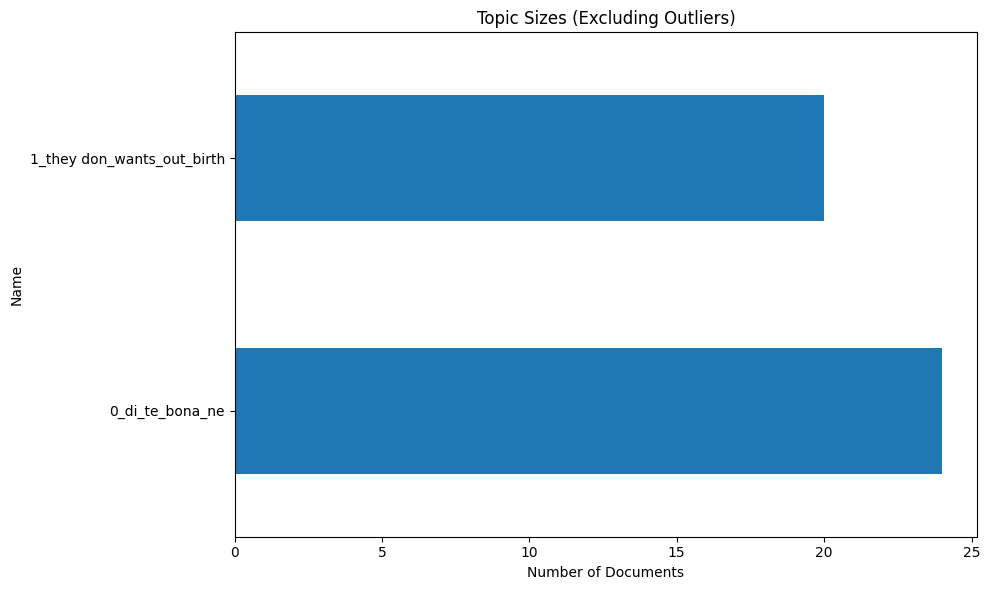


Topic 0:
  Top words: di, te, bona, ne, even, hard, ho re, ra, the that, the day

Topic 1:
  Top words: they don, wants, out, birth, african, beat, cancer, yourself, say the, vaccine is

Analysis complete! Key outputs:
- Topic hierarchy visualization
- Topic similarity matrix
- Term rank chart
- Topic sizes bar chart
- Detailed topic word lists


In [4]:
# Install required packages (if not already installed)
!pip install bertopic umap-learn hdbscan sentence-transformers

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
import pandas as pd
import matplotlib.pyplot as plt

class BERTopicAnalyzer:
    """Focused BERTopic analyzer for English translations of Setswana podcasts"""

    def __init__(self):
        # Custom stopwords for your specific dataset
        self.custom_stopwords = [
            'um', 'uh', 'ah', 'er', 'hmm', 'yeah', 'yes', 'no', 'ok', 'okay',
            'well', 'so', 'like', 'you know', 'i mean', 'setswana', 'podcast',
            'going', 'come', 'one', 'get', 'make', 'know', 'take', 'want',
            'think', 'time', 'said', 'hore', 'hartha', 'ore', 'tele'
        ]

    def load_data(self, file_path):
        """Load and preprocess your translated transcripts"""
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()

        # Simple parsing - modify based on your file structure
        if "---" in content or "TRANSCRIPT" in content.upper():
            sections = re.split(r'\n(?=---|\w+\s*TRANSCRIPT)', content, flags=re.IGNORECASE)
            documents = [' '.join([line.strip() for line in section.split('\n')
                        if not line.strip().startswith('---') and 'TRANSCRIPT' not in line.upper()]).strip()
                        for section in sections if section.strip()]
        else:
            documents = [line.strip() for line in content.split('\n') if line.strip()]

        return [doc for doc in documents if len(doc) > 20]  # Filter very short entries

    def initialize_bertopic(self):
        """Configure BERTopic with optimal settings for your data"""

        # Step 1: Embedding model (using paraphrase-MiniLM for better multilingual handling)
        embedding_model = SentenceTransformer("paraphrase-MiniLM-L3-v2")

        # Step 2: Reduce dimensionality
        umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

        # Step 3: Cluster reduced embeddings
        hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean',
                               cluster_selection_method='eom', prediction_data=True)

        # Step 4: Vectorizer model with custom stopwords
        from sklearn.feature_extraction.text import CountVectorizer
        vectorizer_model = CountVectorizer(stop_words=self.custom_stopwords,
                                         ngram_range=(1, 2),  # Include bigrams
                                         min_df=2, max_df=0.8)

        # Initialize BERTopic
        topic_model = BERTopic(
            embedding_model=embedding_model,
            umap_model=umap_model,
            hdbscan_model=hdbscan_model,
            vectorizer_model=vectorizer_model,
            language="english",  # Even though source is Setswana, we're using English translations
            calculate_probabilities=True,
            verbose=True
        )

        return topic_model

    def run_bertopic_analysis(self, documents):
        """Run complete BERTopic analysis pipeline"""

        # Initialize model
        topic_model = self.initialize_bertopic()

        # Fit the model
        topics, probs = topic_model.fit_transform(documents)

        return topic_model, topics, probs

    def visualize_results(self, topic_model, documents):
        """Generate key visualizations"""

        # 1. Topic hierarchy
        fig = topic_model.visualize_hierarchy()
        fig.show()

        # 2. Topic similarity
        fig = topic_model.visualize_heatmap()
        fig.show()

        # 3. Term score decline (helps evaluate topic quality)
        fig = topic_model.visualize_term_rank()
        fig.show()

        # 4. Custom bar chart of topics
        topic_info = topic_model.get_topic_info()
        plt.figure(figsize=(10, 6))
        topic_info[topic_info.Topic != -1].set_index('Name').Count.plot(kind='barh')
        plt.title('Topic Sizes (Excluding Outliers)')
        plt.xlabel('Number of Documents')
        plt.tight_layout()
        plt.show()

        return topic_info

    def get_topic_details(self, topic_model, n_words=10):
        """Get detailed view of each topic"""
        topics = topic_model.get_topics()

        for topic_num, word_weights in topics.items():
            if topic_num != -1:  # Skip outlier topic
                print(f"\nTopic {topic_num}:")
                words = [word for word, weight in word_weights[:n_words]]
                print("  Top words:", ", ".join(words))

                # You might want to add manual interpretation here
                if "vaccine" in words and "children" in words:
                    print("  Likely about: Child vaccination")
                elif "africa" in words and "south" in words:
                    print("  Likely about: South African context")

def run_full_bertopic_analysis():
    """Complete BERTopic analysis workflow"""
    analyzer = BERTopicAnalyzer()

    # Load data
    print("Please upload your English transcript file (TXT format):")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    documents = analyzer.load_data(filename)

    print(f"\nLoaded {len(documents)} documents")
    print("Sample document:", documents[0][:100] + "...")

    # Run analysis
    topic_model, topics, probs = analyzer.run_bertopic_analysis(documents)

    # Visualize results
    topic_info = analyzer.visualize_results(topic_model, documents)

    # Show detailed topics
    analyzer.get_topic_details(topic_model)

    print("\nAnalysis complete! Key outputs:")
    print("- Topic hierarchy visualization")
    print("- Topic similarity matrix")
    print("- Term rank chart")
    print("- Topic sizes bar chart")
    print("- Detailed topic word lists")

    return topic_model, topic_info

# Run the analysis
bertopic_model, bertopic_info = run_full_bertopic_analysis()